<a href="https://colab.research.google.com/github/X-abs343/Computer-Vision-projects-/blob/main/CV5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image registration and optimization technique

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.io import imshow

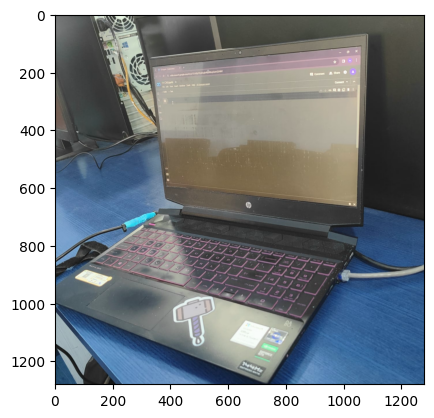

In [ ]:
image1=cv2.imread('Laptop1.jpg')
plt.imshow(image1)

In [ ]:
image1

array([[115, 115, 116, ...,  94,  94,  94],
       [115, 116, 116, ...,  94,  94,  94],
       [115, 116, 116, ...,  93,  93,  93],
       ...,
       [ 81,  81,  81, ..., 108, 108, 108],
       [ 82,  82,  82, ..., 109, 109, 109],
       [ 83,  83,  82, ..., 109, 109, 109]], dtype=uint8)

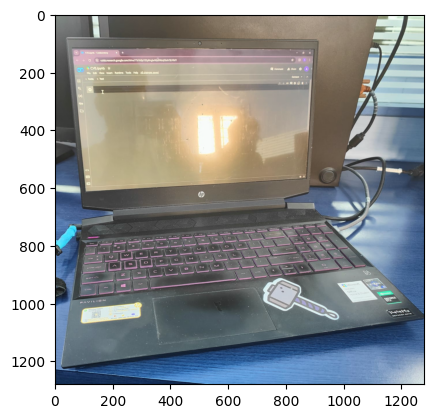

In [ ]:
image2=cv2.imread('Laptop2.jpg')
plt.imshow(image2)

In [ ]:
image2

array([[137, 136, 136, ..., 231, 231, 231],
       [136, 136, 136, ..., 233, 233, 233],
       [136, 135, 135, ..., 236, 236, 236],
       ...,
       [ 50,  50,  50, ..., 228, 228, 228],
       [ 48,  49,  49, ..., 229, 229, 230],
       [ 49,  49,  49, ..., 230, 230, 231]], dtype=uint8)

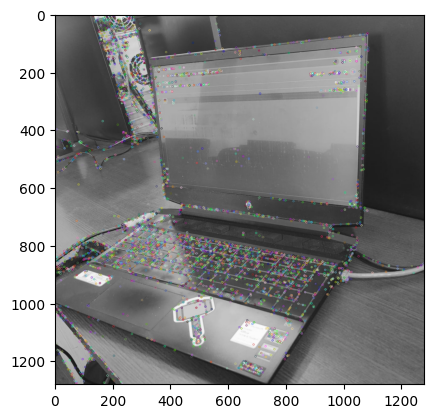

In [ ]:
sift= cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(image1,None)
img_1 = cv2.drawKeypoints(image1,keypoints_1,image1)
plt.imshow(img_1)

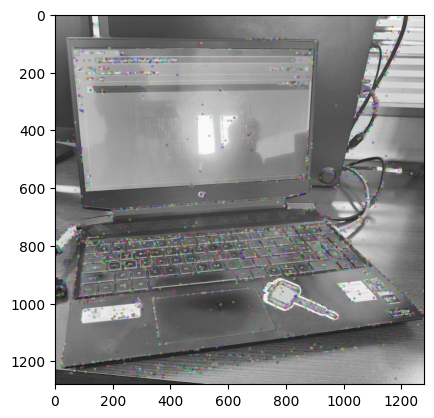

In [ ]:
keypoints_2, descriptors_2 = sift.detectAndCompute(image2,None)
img_2 = cv2.drawKeypoints(image2,keypoints_2,image2)
plt.imshow(img_2)

In [ ]:
len(keypoints_1),len(keypoints_2)

(4475, 3878)

In [ ]:
#Feature matching
bf=cv2.BFMatcher(cv2.NORM_L1,crossCheck=True)
matches=bf.match(descriptors_1,descriptors_2)
matches=sorted(matches, key= lambda x:x.distance)

In [ ]:
len(matches)

723

In [ ]:
img3=cv2.drawMatches(img_1,keypoints_1,img_2,keypoints_2,matches[:100],img_2,flags=2)

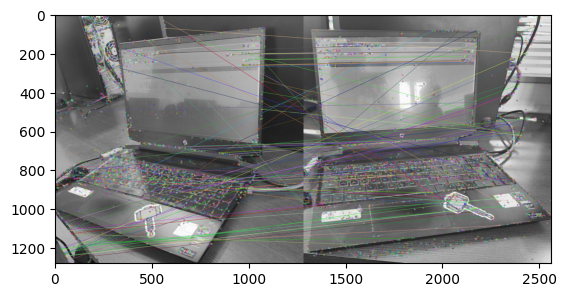

In [ ]:
plt.imshow(img3)

In [ ]:
#Extract matches keypoints
src_pts=np.float32([keypoints_1[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
dst_pts=np.float32([keypoints_2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)

In [ ]:
#prespective transformation
M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)

In [ ]:
M

array([[ 2.40428039e+00, -7.36904852e-02, -7.24378080e+02],
       [ 2.84356534e-01,  1.58859496e+00, -2.30106559e+02],
       [ 9.81017724e-04, -5.74039416e-05,  1.00000000e+00]])

In [ ]:
#apply prespective transformation
newImage1 = cv2.warpPerspective(img_1, M, dsize=(img_2.shape[1], img_2.shape[0]))

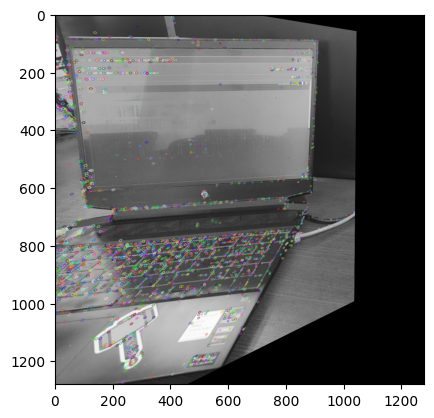

In [ ]:
plt.imshow(newImage1)

Text(0.5, 1.0, 'Registered')

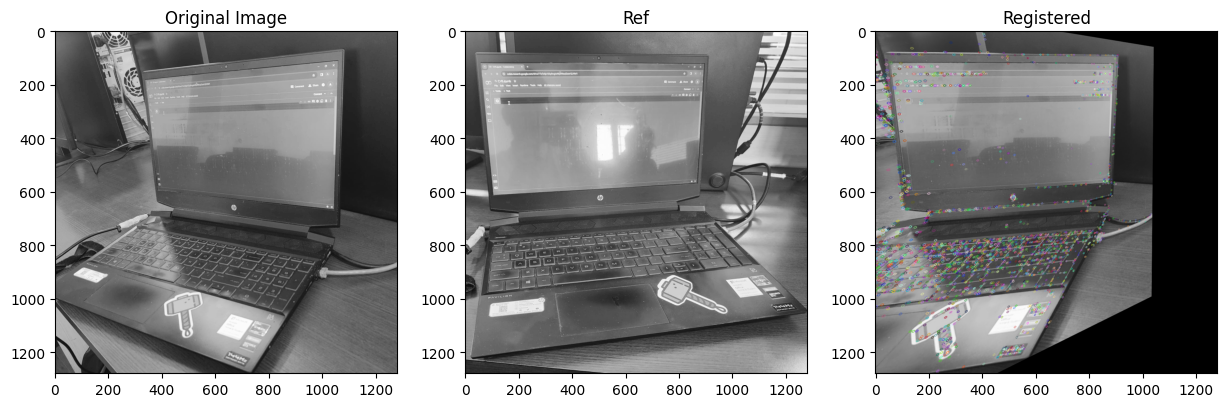

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(image2, cmap='gray')
plt.title('Ref')

plt.subplot(1, 3, 3)
plt.imshow(newImage1)
plt.title('Registered')
